In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('paper3.csv')
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'paper3.csv'

In [ ]:
df.describe()

,VES S/N,Topsoil,Laterite p2,Weathered p3,p4,p5,Topsoil h1,Laterite h2,Weathered h3,Aquifer Res,...,Tr (m2/day),RC,FC,H1H2,H3H4,(H1H2 +H3H4)+15,GW Norm,estimated Gw pot,PotentialT2,Pot norm
count,109.000000,109.000000,109.000000,109.000000,109.000000,23.000000,109.000000,16.000000,109.000000,109.000000,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,55.000000,319.207339,81.934862,73.220183,1074.828440,665.369565,2.729358,5.550000,20.777982,70.819266,...,272.465245,-0.631596,0.249994,3.544037,26.155046,44.699083,0.060530,0.453928,28.859184,0.408396
std,31.609598,297.508597,465.581760,70.144854,2098.160552,673.935352,2.400937,5.154416,10.032238,62.783276,...,259.725583,0.208798,0.195554,3.406895,10.972014,11.015339,0.136162,1.021023,14.774748,0.209084
min,1.000000,35.900000,0.000000,10.100000,47.500000,127.900000,0.300000,0.000000,1.400000,10.100000,...,3.075800,-0.954800,0.023100,0.400000,4.500000,22.900000,0.001700,0.012400,1.502200,0.021300
25%,28.000000,134.000000,0.000000,28.000000,178.600000,322.250000,1.400000,0.675000,13.000000,28.000000,...,95.909100,-0.796200,0.113400,1.500000,19.300000,38.500000,0.010300,0.077000,16.855200,0.238500
50%,55.000000,230.500000,0.000000,48.500000,423.600000,461.000000,2.100000,5.450000,20.900000,47.100000,...,177.689200,-0.652800,0.210100,2.200000,25.400000,43.800000,0.022000,0.164700,29.418900,0.416300
75%,82.000000,364.800000,0.000000,90.100000,814.500000,639.700000,2.900000,10.700000,26.600000,91.200000,...,348.211000,-0.529800,0.307400,3.400000,31.000000,49.700000,0.048200,0.361300,37.922600,0.536700
max,109.000000,1953.700000,4665.100000,421.900000,12865.200000,3172.700000,14.600000,14.000000,49.300000,286.700000,...,1224.409200,0.085300,1.186400,16.100000,82.800000,99.800000,1.000000,7.498800,70.664300,1.000000


In [ ]:
X = df[['Topsoil', 'Aquifer Res', 'K','RC', 'FC', 'H1H2', 'H3H4']]
y = df['estimated Gw pot']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# Initialize a scaler (for models that benefit from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Define the models with their respective hyperparameters
models = {
    'Multivariate Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Random Forest Regression': RandomForestRegressor(random_state=2),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=2),
    'Gradient Boosted Regression': GradientBoostingRegressor(random_state=2)
}

In [ ]:
# Define hyperparameters for tuning (as an example)
param_grids = {
    'Multivariate Linear Regression': {},
    'Support Vector Regression': {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]},
    'Random Forest Regression': {'n_estimators': [10, 10, 10], 'max_depth': [3, 5, 10]},
    'Decision Tree Regression': {'max_depth': [3, 5, 10]},
    'Gradient Boosted Regression': {'n_estimators': [10, 10, 10], 'learning_rate': [0.01, 0.1, 0.2]}
}

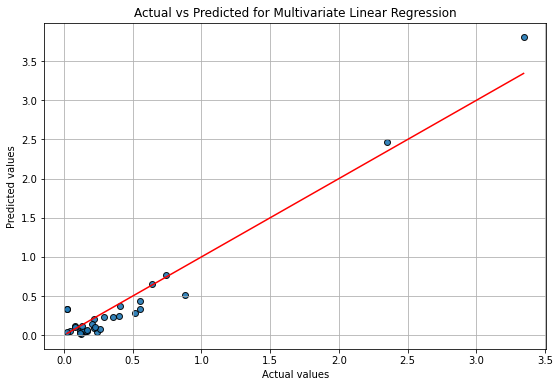

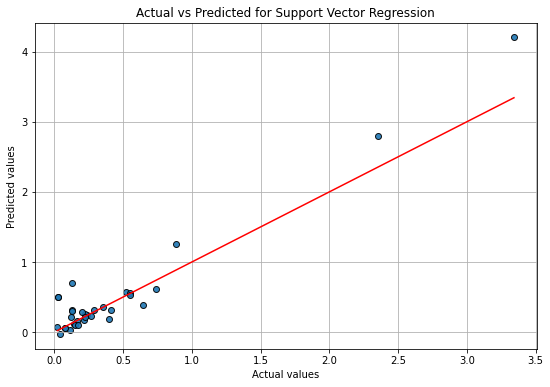

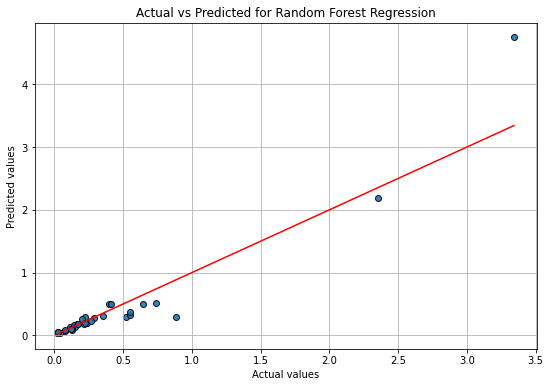

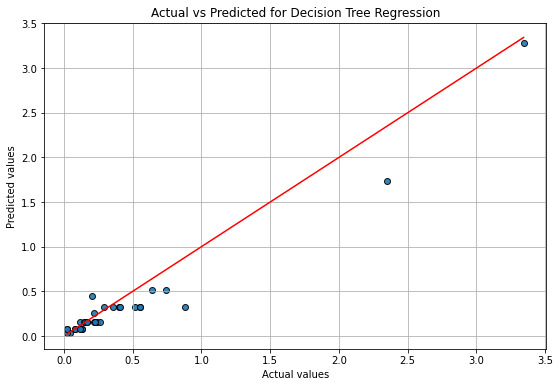

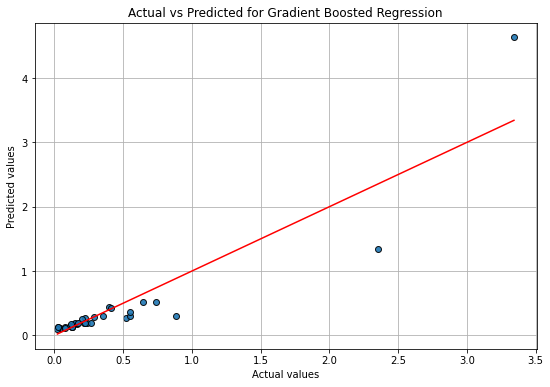


Evaluation Metrics on Training Data:
                            Model       MSE       MAE      RMSE        R2
0  Multivariate Linear Regression  0.050151  0.133942  0.223945  0.961124
1       Support Vector Regression  0.005722  0.066225  0.075643  0.995565
2        Random Forest Regression  0.029217  0.048708  0.170930  0.977352
3        Decision Tree Regression  0.001331  0.025891  0.036484  0.998968
4     Gradient Boosted Regression  0.017074  0.072956  0.130668  0.986765

Evaluation Metrics on Test Data:
                            Model       MSE       MAE      RMSE        R2
0  Multivariate Linear Regression  0.027028  0.124176  0.164401  0.938471
1       Support Vector Regression  0.064537  0.155572  0.254040  0.853080
2        Random Forest Regression  0.078640  0.119347  0.280428  0.820974
3        Decision Tree Regression  0.030722  0.104556  0.175277  0.930060
4     Gradient Boosted Regression  0.100578  0.151901  0.317140  0.771031


In [ ]:
# Initialize DataFrames to store the evaluation metrics for all models (train and test)
metrics_train_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'RMSE', 'R2'])
metrics_test_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'RMSE', 'R2'])
y_test_predictions = {}
# Train each model, perform hyperparameter tuning, and evaluate
for name, model in models.items():
    # If the model requires tuning, use GridSearchCV
    if param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    # Predictions on training data
    y_train_pred = best_model.predict(X_train_scaled)
    
    # Calculate metrics on training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Store the training metrics in the DataFrame
    metrics_train_df = metrics_train_df.append({
        'Model': name,
        'MSE': mse_train,
        'MAE': mae_train,
        'RMSE': rmse_train,
        'R2': r2_train
    }, ignore_index=True)
    
    # Predictions on test data
    y_test_pred = best_model.predict(X_test_scaled)
    
# storing the predictions in the dictionary
    y_test_predictions[name] = y_test_pred

    # Calculate metrics on test data
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Store the test metrics in the DataFrame
    metrics_test_df = metrics_test_df.append({
        'Model': name,
        'MSE': mse_test,
        'MAE': mae_test,
        'RMSE': rmse_test,
        'R2': r2_test
    }, ignore_index=True)

        # Scatter plot of actual vs predicted values
    plt.figure(figsize=(9, 6))
    plt.scatter(y_test, y_test_pred, edgecolor='k', alpha=0.9)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=1.5)
    plt.title(f'Actual vs Predicted for {name}')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.grid(True)
    plt.show()


# Display all the evaluation metrics for training data
print("\nEvaluation Metrics on Training Data:")
print(metrics_train_df)

# Display all the evaluation metrics for test data
print("\nEvaluation Metrics on Test Data:")
print(metrics_test_df)

In [ ]:
#Displaying the predicted values to be plotted
print("\nPredictions foy y_test by each model:")
for name, predictions in y_test_predictions.items():
    print(f"\nModel: {name}")
    print(predictions)


Predictions foy y_test by each model:

Model: Multivariate Linear Regression
[0.05871411 0.65638057 0.23767026 0.51581635 0.04890111 0.24747293
 0.03556072 3.80226441 0.11797675 0.05934746 0.23635282 0.09733289
 0.77306131 0.27993178 0.20596246 0.33345773 0.37642491 0.04458816
 0.08386286 0.33514207 0.04312046 0.0551087  0.33345773 0.05066568
 2.46709005 0.01538797 0.11423068 0.10473964 0.14607348 0.43668029
 0.06397206 0.02683502 0.10316131]

Model: Support Vector Regression
[-0.02699029  0.39194239  0.35316466  1.25869784  0.16037795  0.18989767
  0.23847951  4.20289926  0.05140099  0.02442469  0.31640555  0.16642297
  0.61400265  0.56991153  0.26348882  0.5060871   0.31110379  0.0786618
  0.23443023  0.56166841  0.11899926  0.09863686  0.5060871   0.31235048
  2.8005236   0.30769533  0.70312205  0.05451456  0.29201126  0.52362355
  0.10093254  0.21599856  0.21143695]

Model: Random Forest Regression
[0.03732067 0.50193333 0.30548    0.286735   0.17984083 0.49676
 0.199225   4.74628

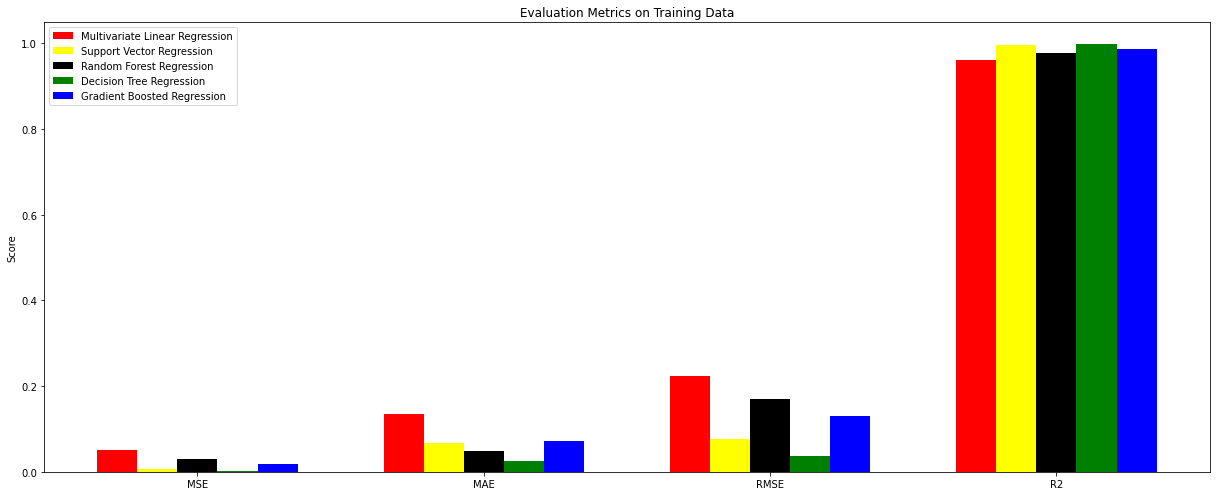

In [ ]:
# Training, evaluation and plotting of Train Data

# Store evaluation metrics for training data
metrics_train = pd.DataFrame(index=['MSE', 'MAE', 'RMSE', 'R2'])

# Training each model, this involves performing hyperparameter tuning, and evaluate on training data
for name, model in models.items():
    # If the model requires tuning, use GridSearchCV
    if param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    # Predictions on training data
    y_train_pred = best_model.predict(X_train_scaled)
    
    # Calculate metrics on training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Store training metrics
    metrics_train[name] = [mse_train, mae_train, rmse_train, r2_train]

# Transpose the metrics DataFrame for easier plotting
metrics_train = metrics_train.T

# Define colors for each model
colors = ['red', 'yellow', 'black', 'green', 'blue']

# Plot training metrics as grouped bar charts
fig, ax = plt.subplots(figsize=(17, 7))

# Define the position of each group of bars
bar_width = 0.14
index = np.arange(len(metrics_train.columns))

# Plot each model's metrics
for i, model in enumerate(metrics_train.index):
    ax.bar(index + i * bar_width, metrics_train.loc[model], bar_width, label=model, color=colors[i])

# Customizing the plot
ax.set_title('Evaluation Metrics on Training Data')
ax.set_ylabel('Score')
ax.set_xticks(index + bar_width * 2)
ax.set_xticklabels(metrics_train.columns)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

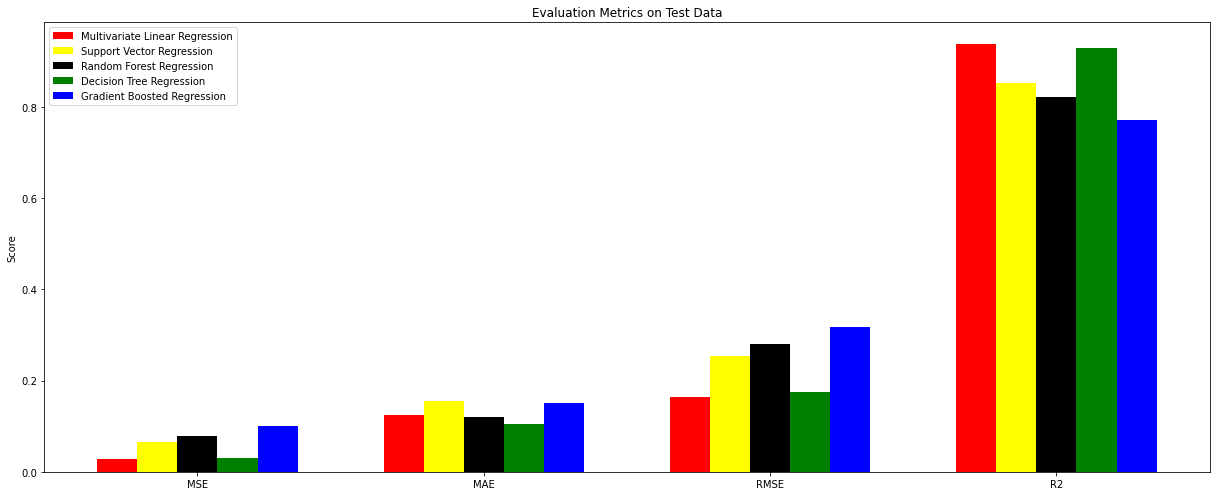

In [ ]:
#Training , evaluation on test data
# Store evaluation metrics
metrics = pd.DataFrame(index=['MSE', 'MAE', 'RMSE', 'R2'])

# Train each model, perform hyperparameter tuning, and evaluate
for name, model in models.items():
    # If the model requires tuning, use GridSearchCV
    if param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics
    metrics[name] = [mse, mae, rmse, r2]

# Transpose the metrics DataFrame for easier plotting
metrics = metrics.T

# Define colors for each model
colors = ['red', 'yellow', 'black', 'green', 'blue']

# Plot metrics as grouped bar charts
fig, ax = plt.subplots(figsize=(17, 7))

# Define the position of each group of bars
bar_width = 0.14
index = np.arange(len(metrics.columns))

# Plot each model's metrics
for i, model in enumerate(metrics.index):
    ax.bar(index + i * bar_width, metrics.loc[model], bar_width, label=model, color=colors[i])

# Customizing the plot
ax.set_title('Evaluation Metrics on Test Data')
ax.set_ylabel('Score')
ax.set_xticks(index + bar_width * 2)
ax.set_xticklabels(metrics.columns)
ax.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
# Extract the minimum and maximum values from original test data


min_vas = np.min(X_test)

max_vas = np.max(X_test)


print(min_vas, max_vas)

Topsoil        45.4000
Aquifer Res    10.1000
K               1.9709
RC             -0.9267
FC              0.0380
H1H2            0.5000
H3H4            9.1000
dtype: float64 Topsoil        1217.6000
Aquifer Res     286.7000
K                44.6865
RC               -0.0934
FC                0.8292
H1H2             13.9000
H3H4             82.8000
dtype: float64


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9384705082571763

In [ ]:
lrrr = lr.predict(X_train)
lrr = lr.predict(X_test)
lr.score(X_train, y_train)

0.9611242896661332

In [ ]:
# Extract the minimum and maximum values from original test data

min_vas = np.min(y_test)

max_vas = np.max(y_test)

print(min_vas, max_vas)

0.0221 3.3429


In [ ]:
# Extract the minimum and maximum values from the predictions
min_value = np.min(lrr)
max_value = np.max(lrr)
print(min_value, max_value)

0.015387973766959107 3.8022644074828538


In [ ]:
# Predict on training and validation sets
# lrrr or y_train_pred = model.predict(X_train)
# lrr or y_val_pred = model.predict(X_test)

# Calculate the evaluation metrics
metrics = {
    'LMSE': [mean_squared_error(y_train, lrrr), mean_squared_error(y_test, lrr)],
    'LMAE': [mean_absolute_error(y_train, lrrr), mean_absolute_error(y_test, lrr)],
    'LRMSE': [np.sqrt(mean_squared_error(y_train, lrrr)), np.sqrt(mean_squared_error(y_test, lrr))],
    'LR2': [r2_score(y_train, lrrr), r2_score(y_test, lrr)]
}
LMSE = mean_squared_error(y_test, lrr)
LMAE = mean_absolute_error(y_test, lrr),
LRMSE = np.sqrt(mean_squared_error(y_test, lrr)),
LR2 = r2_score(y_test, lrr)
LMSE, LMAE, LRMSE,LR2

(0.02702769473576539,
 (0.12417624792236075,),
 (0.1644010180496623,),
 0.9384705082571763)

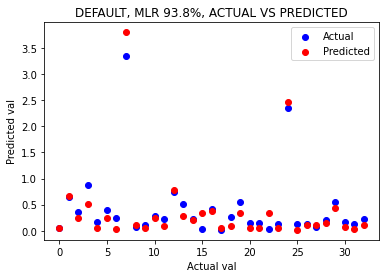

In [ ]:
#visualization of the plot in scatter format using matplot library
actual_data = y_test
predicted = lrr
 
plt.scatter(range(len(actual_data)), actual_data, color='blue', label = 'Actual')
plt.scatter(range(len(predicted)), predicted, color='red', label = 'Predicted')
plt.xlabel('Actual val')
plt.ylabel('Predicted val')
plt.title('DEFAULT, MLR 93.8%, ACTUAL VS PREDICTED')
plt.legend()
plt.show()

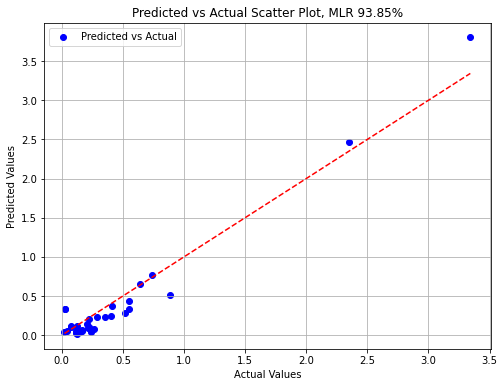

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
actual_values = y_test
predicted_values = lrr
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.scatter(actual_values, predicted_values, c='blue', label='Predicted vs Actual')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (y=x)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--')

plt.title('Predicted vs Actual Scatter Plot, MLR 93.85%')
plt.grid(True)  # Optional: Add grid lines

plt.show()

In [ ]:
svm = SVR()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.47952240553173486

In [ ]:
svrr = svm.predict(X_test)
svrrr = svm.predict(X_train)
svm.score(X_train, y_train)

# Extract the minimum and maximum values from the predictions

min_val = np.min(svrr)

max_val = np.max(svrr)

print(min_val, max_val)

-0.02100466930570205 1.125710469958995


In [ ]:
# Predict on training and validation sets
# svrrr or y_train_pred = model.predict(X_train)
# svrr or y_val_pred = model.predict(X_test)

# Calculate the evaluation metrics
metrics = {
    'MSE': [mse(y_train, svrrr), mse(y_test, svrr)],
    'MAE': [mae(y_train, svrrr), mae(y_test, svrr)],
    'MAPE': [mape(y_train, svrrr), mape(y_test, svrr)],
    'R2': [r2(y_train, svrrr), r2(y_test, svrr)]
}

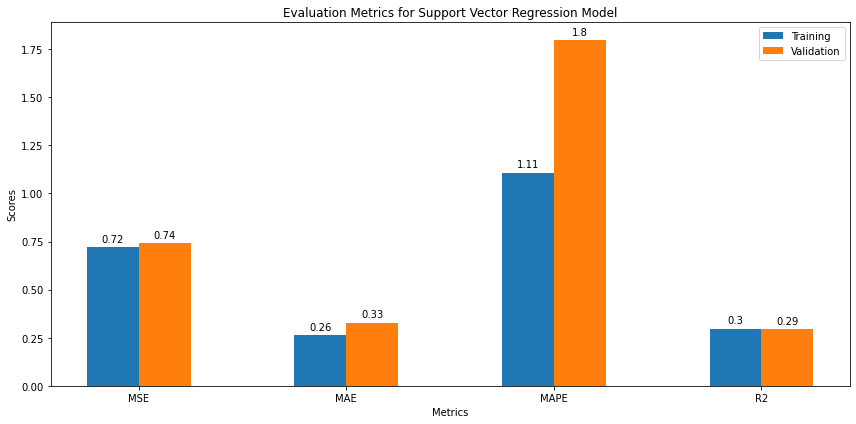

In [ ]:
# Evaluation mmetrics plot for linear regression
labels = list(metrics.keys())
train_metrics = [metrics[metric][0] for metric in labels]
val_metrics = [metrics[metric][1] for metric in labels]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_metrics, width, label='Training')
rects2 = ax.bar(x + width/2, val_metrics, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics for Support Vector Regression Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels above bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

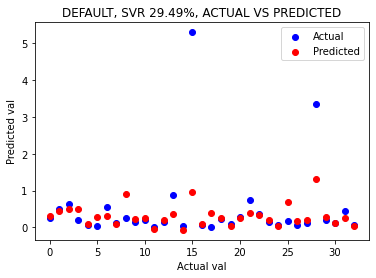

In [ ]:
#visualization of the plot in scatter format
actual_data = y_test
predicted = svrr
 
plt.scatter(range(len(actual_data)), actual_data, color='blue', label = 'Actual')
plt.scatter(range(len(predicted)), predicted, color='red', label = 'Predicted')
plt.xlabel('Actual val')
plt.ylabel('Predicted val')
plt.title('DEFAULT, SVR 29.49%, ACTUAL VS PREDICTED')
plt.legend()
plt.show()

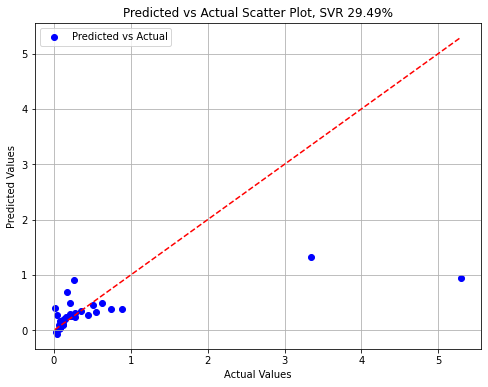

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
actual_values = y_test
predicted_values = svrr
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.scatter(actual_values, predicted_values, c='blue', label='Predicted vs Actual')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (y=x)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--')

plt.title('Predicted vs Actual Scatter Plot, SVR 29.49%')
plt.grid(True)  # Optional: Add grid lines

plt.show()

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.9337769999322904

In [ ]:
rfr.score(X_train, y_train)

0.9664924419447967

In [ ]:
rfrrr = rfr.predict(X_train)
rfrr = rfr.predict(X_test)

# Extract the minimum and maximum values from the predictions

min_valu = np.min(rfrr)

max_valu = np.max(rfrr)

print(min_valu, max_valu)

0.021810000000000003 4.01307


In [ ]:
# Predict on training and validation sets
# rfrrr or y_train_pred = model.predict(X_train)
# rfrr or y_val_pred = model.predict(X_test)

# Calculate the evaluation metrics
metrics = {
    'MSE': [mse(y_train, rfrrr), mse(y_test, rfrr)],
    'MAE': [mae(y_train, rfrrr), mae(y_test, rfrr)],
    'MAPE': [mape(y_train, rfrrr), mape(y_test, rfrr)],
    'R2': [r2(y_train, rfrrr), r2(y_test, rfrr)]
}

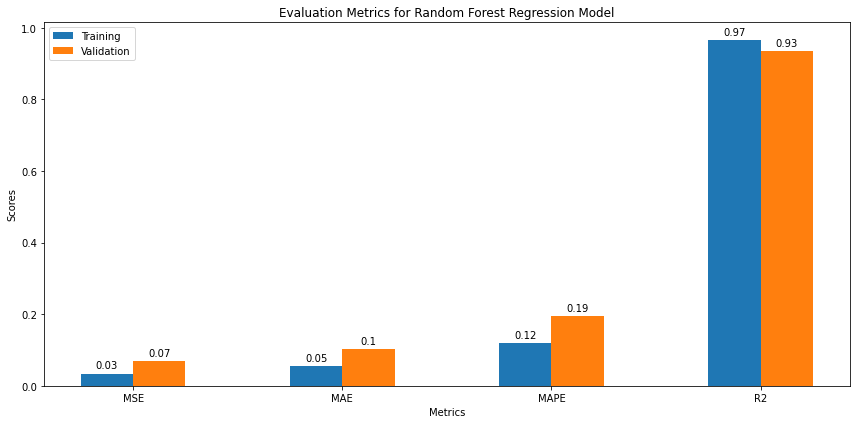

In [ ]:
# Evaluation mmetrics plot for linear regression
labels = list(metrics.keys())
train_metrics = [metrics[metric][0] for metric in labels]
val_metrics = [metrics[metric][1] for metric in labels]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_metrics, width, label='Training')
rects2 = ax.bar(x + width/2, val_metrics, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics for Random Forest Regression Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels above bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

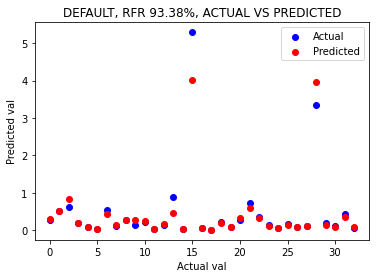

In [ ]:
#visualization of the plot in scatter format
actual_data = y_test
predicted = rfrr
 
plt.scatter(range(len(actual_data)), actual_data, color='blue', label = 'Actual')
plt.scatter(range(len(predicted)), predicted, color='red', label = 'Predicted')
plt.xlabel('Actual val')
plt.ylabel('Predicted val')
plt.title('DEFAULT, RFR 93.38%, ACTUAL VS PREDICTED')
plt.legend()
plt.show()

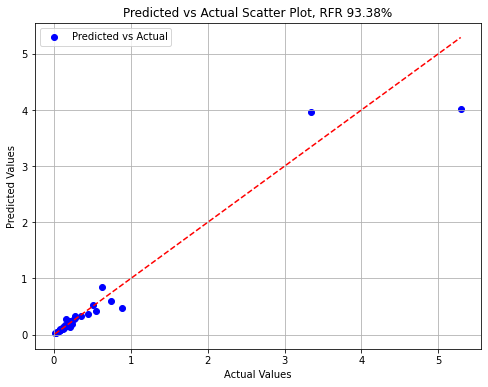

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
actual_values = y_test
predicted_values = rfrr
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.scatter(actual_values, predicted_values, c='blue', label='Predicted vs Actual')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (y=x)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--')

plt.title('Predicted vs Actual Scatter Plot, RFR 93.38%')
plt.grid(True)  # Optional: Add grid lines

plt.show()

In [ ]:
mdl = tree.DecisionTreeRegressor()
mdl.fit(X_train, y_train)
mdl.score(X_train, y_train)


1.0

In [ ]:
mdl.score(X_test, y_test)

0.8762570904636229

In [ ]:
dtrr = mdl.predict(X_test)
dtrrr = mdl.predict(X_train)

# Extract the minimum and maximum values from the predictions

min_values = np.min(dtrr)

max_values = np.max(dtrr)

print(min_values, max_values)

0.0126 3.2812


In [ ]:
# Predict on training and validation sets
# dtrrr or y_train_pred = model.predict(X_train)
# dtrr or y_val_pred = model.predict(X_test)

# Calculate the evaluation metrics
metrics = {
    'MSE': [mse(y_train, dtrrr), mse(y_test, dtrr)],
    'MAE': [mae(y_train, dtrrr), mae(y_test, dtrr)],
    'MAPE': [mape(y_train, dtrrr), mape(y_test, dtrr)],
    'R2': [r2(y_train, dtrrr), r2(y_test, dtrr)]
}

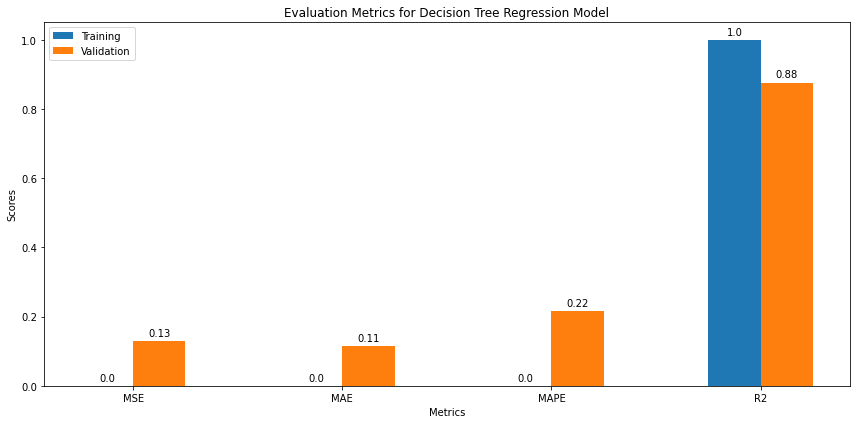

In [ ]:
# Evaluation mmetrics plot for linear regression
labels = list(metrics.keys())
train_metrics = [metrics[metric][0] for metric in labels]
val_metrics = [metrics[metric][1] for metric in labels]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_metrics, width, label='Training')
rects2 = ax.bar(x + width/2, val_metrics, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics for Decision Tree Regression Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels above bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

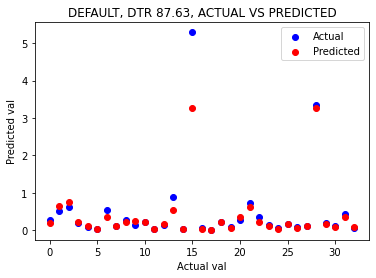

In [ ]:
#visualization of the plot in scatter format
actual_data = y_test
predicted = dtrr
 
plt.scatter(range(len(actual_data)), actual_data, color='blue', label = 'Actual')
plt.scatter(range(len(predicted)), predicted, color='red', label = 'Predicted')
plt.xlabel('Actual val')
plt.ylabel('Predicted val')
plt.title('DEFAULT, DTR 87.63, ACTUAL VS PREDICTED')
plt.legend()
plt.show()

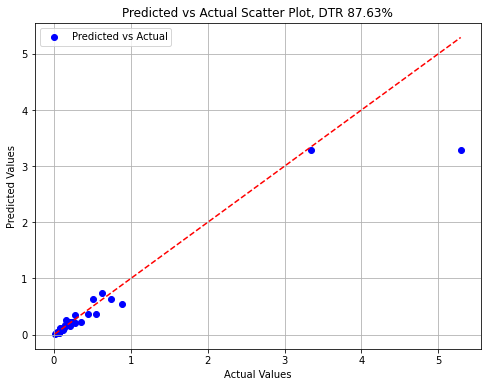

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
actual_values = y_test
predicted_values = dtrr
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.scatter(actual_values, predicted_values, c='blue', label='Predicted vs Actual')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (y=x)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--')

plt.title('Predicted vs Actual Scatter Plot, DTR 87.63%')
plt.grid(True)  # Optional: Add grid lines

plt.show()

In [ ]:

# Importing Gradient boosting regressor into the equation
# This involves initializing the GradientBoostingRegressor just like other regression models and training the model

regressor = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.4, random_state = 2)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)


0.8326690624044943

In [ ]:
gbr = regressor.predict(X_test)
gbrr = regressor.predict(X_train)
regressor.score(X_train, y_train)

# Extract the minimum and maximum values from the predictions

min_vals = np.min(gbr)

max_vals = np.max(gbr)

print(min_vals, max_vals)

0.028756651224044895 3.034038820972499


In [ ]:
# Predict on training and validation sets
# gbrrr or y_train_pred = model.predict(X_train)
# gbrr or y_val_pred = model.predict(X_test)

# Calculate the evaluation metrics

metrics = {
    'MSE': [mse(y_train, gbrr), mse(y_test, gbr)],
    'MAE': [mae(y_train, gbrr), mae(y_test, gbr)],
    'MAPE': [mape(y_train, gbrr), mape(y_test, gbr)],
    'R2': [r2(y_train, gbrr), r2(y_test, gbr)]
}

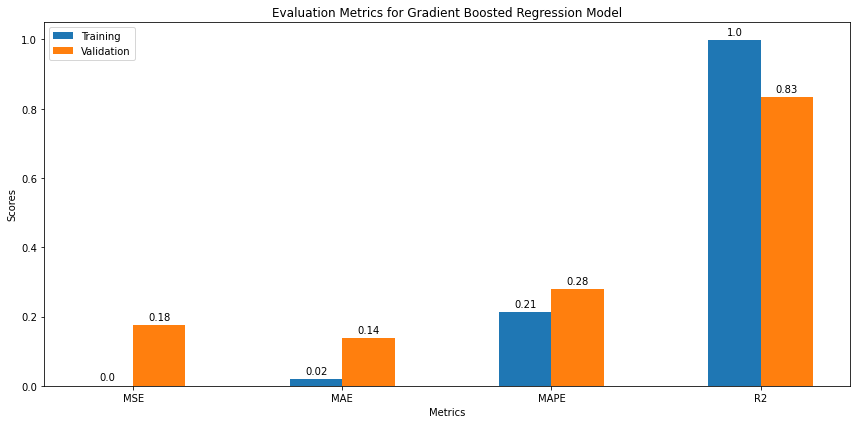

In [ ]:
# Evaluation mmetrics plot for linear regression
labels = list(metrics.keys())
train_metrics = [metrics[metric][0] for metric in labels]
val_metrics = [metrics[metric][1] for metric in labels]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_metrics, width, label='Training')
rects2 = ax.bar(x + width/2, val_metrics, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics for Gradient Boosted Regression Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels above bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

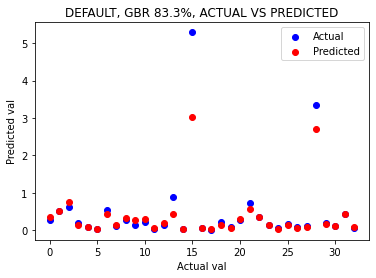

In [ ]:
#visualization of the plot in scatter format
actual_data = y_test
predicted = gbr
 
plt.scatter(range(len(actual_data)), actual_data, color='blue', label = 'Actual')
plt.scatter(range(len(predicted)), predicted, color='red', label = 'Predicted')
plt.xlabel('Actual val')
plt.ylabel('Predicted val')
plt.title('DEFAULT, GBR 83.3%, ACTUAL VS PREDICTED')
plt.legend()
plt.show()

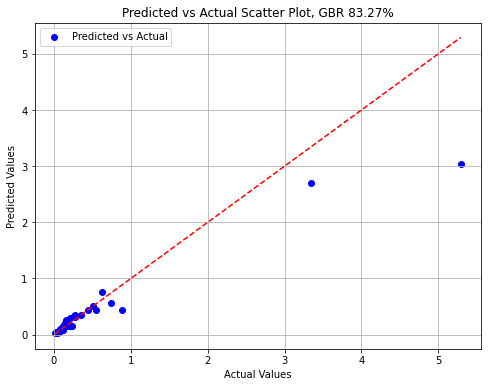

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
actual_values = y_test
predicted_values = gbr
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.scatter(actual_values, predicted_values, c='blue', label='Predicted vs Actual')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (y=x)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--')

plt.title('Predicted vs Actual Scatter Plot, GBR 83.27%')
plt.grid(True)  # Optional: Add grid lines

plt.show()